# Anscombe's Quartet — Analysis

Anscombe's Quartet consists of four datasets that share nearly identical descriptive statistics
(mean, variance, correlation, regression line) but look completely different when plotted.
This notebook demonstrates why visualization is an essential companion to summary statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp_stats

%matplotlib inline

# One distinct color per dataset — used consistently across all plots
COLORS = {
    'I':   '#2196F3',  # blue
    'II':  '#E91E63',  # pink/red
    'III': '#4CAF50',  # green
    'IV':  '#FF9800',  # orange
}
# Darker shade for regression lines / reference lines
DARK_COLORS = {
    'I':   '#0D47A1',
    'II':  '#880E4F',
    'III': '#1B5E20',
    'IV':  '#E65100',
}

## 1. Load Data

In [2]:
df = pd.read_csv('anscombe_quartet.tsv', sep='\t')
print(f'Shape: {df.shape}')
df.head(12)

Shape: (44, 3)


,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.82


## 2. Descriptive Statistics

In [3]:
desc = df.groupby('dataset')[['x', 'y']].describe().round(2)
display(desc)

x                                           y                   \
        count mean   std  min  25%  50%   75%   max count mean   std   min   
dataset                                                                      
I        11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  4.26   
II       11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  3.10   
III      11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  5.39   
IV       11.0  9.0  3.32  8.0  8.0  8.0   8.0  19.0  11.0  7.5  2.03  5.25   

                                  
          25%   50%   75%    max  
dataset                           
I        6.32  7.58  8.57  10.84  
II       6.70  8.14  8.95   9.26  
III      6.25  7.11  7.98  12.74  
IV       6.17  7.04  8.19  12.50

In [4]:
results = []
for name, group in df.groupby('dataset'):
    slope, intercept, r, p, se = sp_stats.linregress(group['x'], group['y'])
    results.append({
        'dataset': name,
        'x mean': round(group['x'].mean(), 3),
        'y mean': round(group['y'].mean(), 3),
        'x var': round(group['x'].var(), 3),
        'y var': round(group['y'].var(), 3),
        'correlation': round(r, 3),
        'slope': round(slope, 3),
        'intercept': round(intercept, 3),
        'r²': round(r**2, 3)
    })

summary = pd.DataFrame(results).set_index('dataset')
print('Summary statistics — note how similar all four datasets are:')
display(summary)

Summary statistics — note how similar all four datasets are:


,x mean,y mean,x var,y var,correlation,slope,intercept,r²
dataset,,,,,,,,
I,9.0,7.501,11.0,4.127,0.816,0.5,3.000,0.667
II,9.0,7.501,11.0,4.128,0.816,0.5,3.001,0.666
III,9.0,7.500,11.0,4.123,0.816,0.5,3.002,0.666
IV,9.0,7.501,11.0,4.123,0.817,0.5,3.002,0.667


## 3. Scatter Plots with Regression Lines

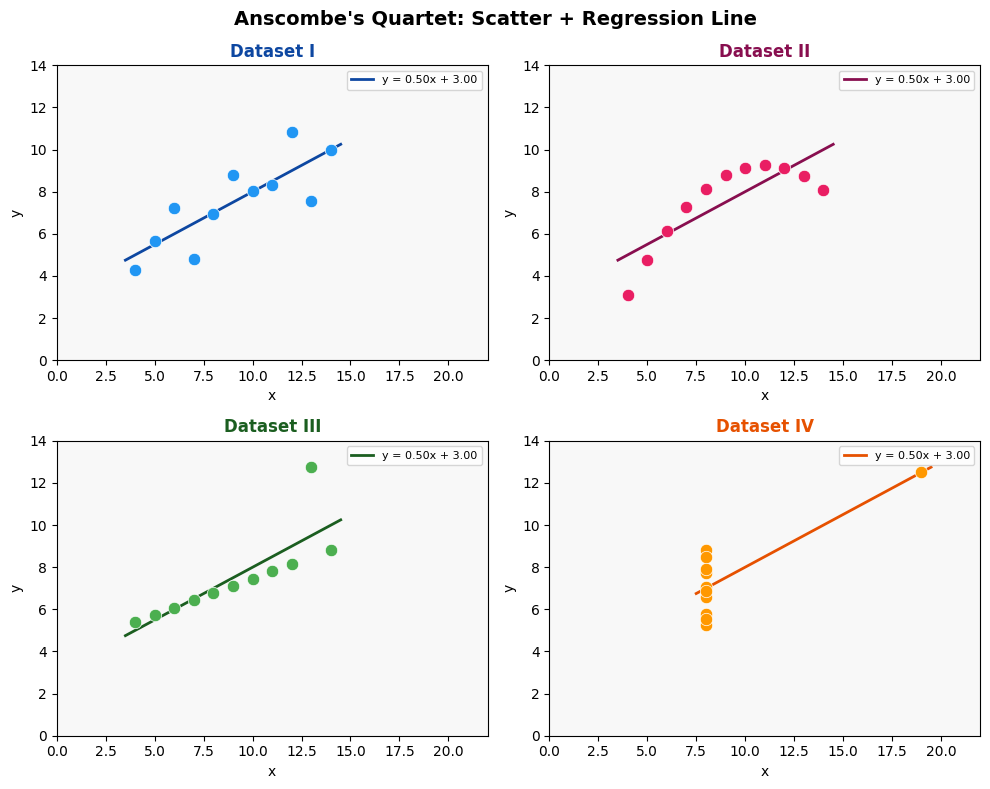

Saved: scatter_regression.png


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (name, group) in enumerate(df.groupby('dataset')):
    ax = axes[i]
    color = COLORS[name]
    dark = DARK_COLORS[name]
    slope, intercept, *_ = sp_stats.linregress(group['x'], group['y'])
    x_line = np.linspace(group['x'].min() - 0.5, group['x'].max() + 0.5, 100)
    ax.scatter(group['x'], group['y'], color=color, s=80, zorder=3, edgecolors='white', linewidths=0.5)
    ax.plot(x_line, slope * x_line + intercept, color=dark, linewidth=2,
            label=f'y = {slope:.2f}x + {intercept:.2f}')
    ax.set_facecolor('#F8F8F8')
    ax.set_title(f'Dataset {name}', fontsize=12, fontweight='bold', color=dark)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(fontsize=8)
    ax.set_xlim(0, 22)
    ax.set_ylim(0, 14)

fig.suptitle("Anscombe's Quartet: Scatter + Regression Line", fontsize=14, fontweight='bold')
plt.tight_layout()
fig.savefig('scatter_regression.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: scatter_regression.png')

## 4. Residual Plots

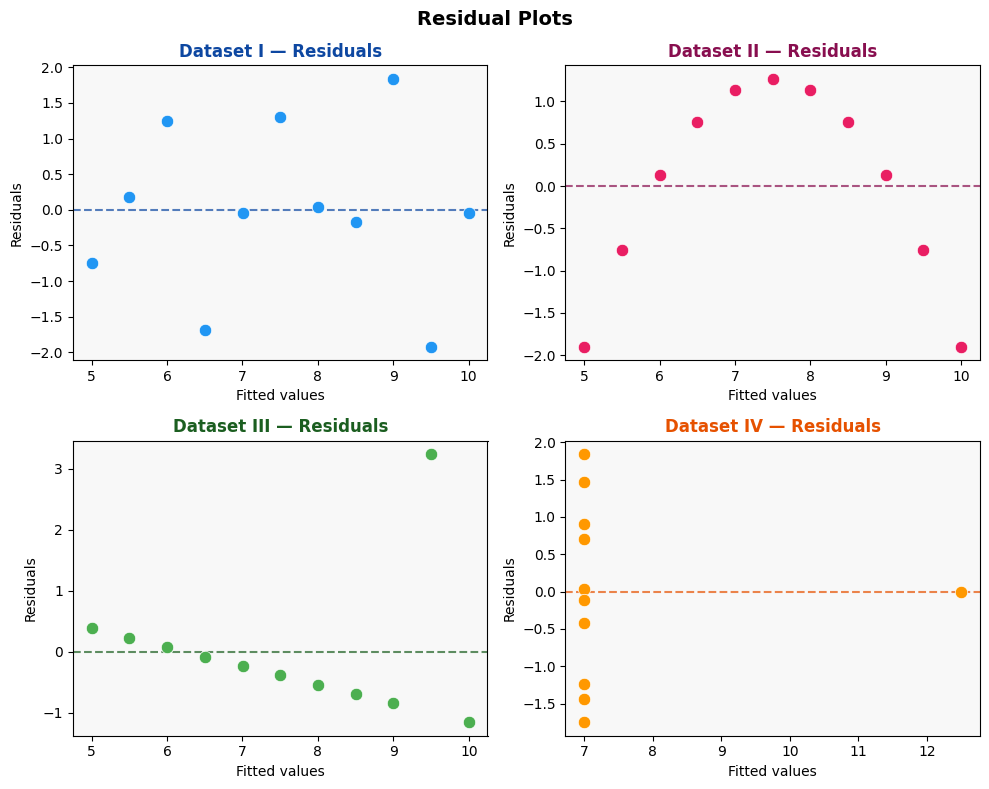

Saved: residual_plots.png


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (name, group) in enumerate(df.groupby('dataset')):
    ax = axes[i]
    color = COLORS[name]
    dark = DARK_COLORS[name]
    slope, intercept, *_ = sp_stats.linregress(group['x'], group['y'])
    fitted = slope * group['x'] + intercept
    residuals = group['y'] - fitted
    ax.axhline(0, color=dark, linewidth=1.5, linestyle='--', alpha=0.7)
    ax.scatter(fitted, residuals, color=color, s=80, edgecolors='white', linewidths=0.5, zorder=3)
    ax.set_facecolor('#F8F8F8')
    ax.set_title(f'Dataset {name} — Residuals', fontsize=12, fontweight='bold', color=dark)
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

fig.suptitle('Residual Plots', fontsize=14, fontweight='bold')
plt.tight_layout()
fig.savefig('residual_plots.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: residual_plots.png')

## 5. Box Plots

/tmp/ipykernel_53127/538790590.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=datasets, patch_artist=True, notch=False)
/tmp/ipykernel_53127/538790590.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=datasets, patch_artist=True, notch=False)


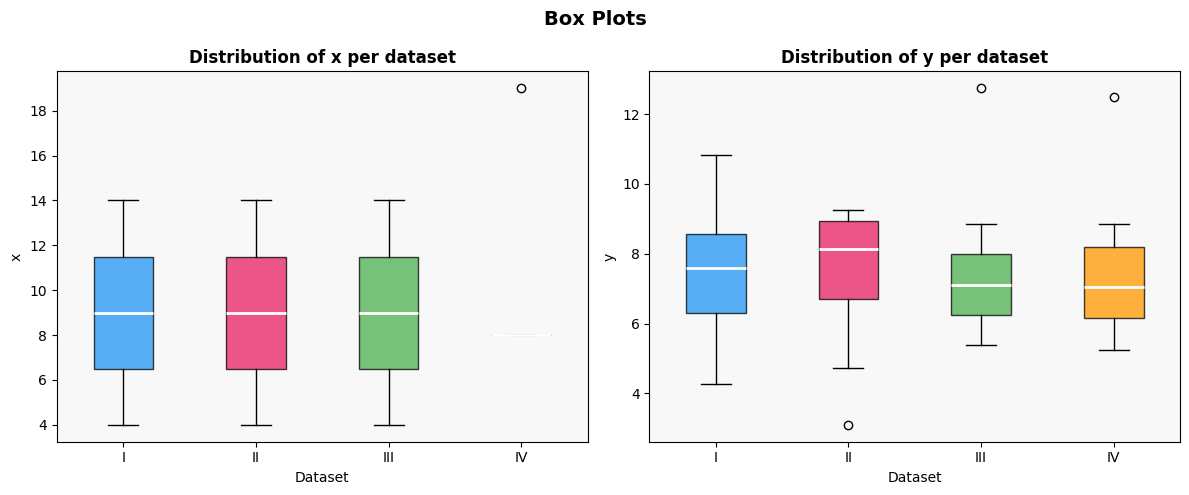

Saved: box_plots.png


In [7]:
datasets = sorted(df['dataset'].unique())
x_data = [df[df['dataset'] == d]['x'].values for d in datasets]
y_data = [df[df['dataset'] == d]['y'].values for d in datasets]
palette = [COLORS[d] for d in datasets]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, data, label in zip(axes, [x_data, y_data], ['x', 'y']):
    bp = ax.boxplot(data, labels=datasets, patch_artist=True, notch=False)
    for patch, color in zip(bp['boxes'], palette):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
    for median in bp['medians']:
        median.set_color('white')
        median.set_linewidth(2)
    ax.set_facecolor('#F8F8F8')
    ax.set_title(f'Distribution of {label} per dataset', fontsize=12, fontweight='bold')
    ax.set_xlabel('Dataset')
    ax.set_ylabel(label)

fig.suptitle('Box Plots', fontsize=14, fontweight='bold')
plt.tight_layout()
fig.savefig('box_plots.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: box_plots.png')

## 6. Violin Plots

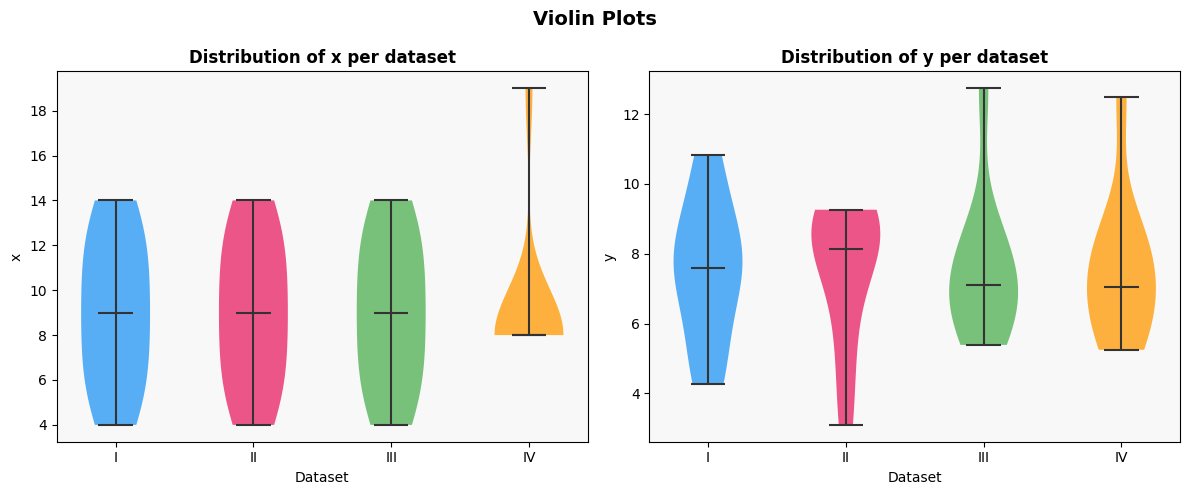

Saved: violin_plots.png


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, data, label in zip(axes, [x_data, y_data], ['x', 'y']):
    vp = ax.violinplot(data, showmedians=True)
    for body, color in zip(vp['bodies'], palette):
        body.set_facecolor(color)
        body.set_alpha(0.75)
    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp[partname].set_edgecolor('#333333')
        vp[partname].set_linewidth(1.5)
    ax.set_xticks(range(1, len(datasets) + 1))
    ax.set_xticklabels(datasets)
    ax.set_facecolor('#F8F8F8')
    ax.set_title(f'Distribution of {label} per dataset', fontsize=12, fontweight='bold')
    ax.set_xlabel('Dataset')
    ax.set_ylabel(label)

fig.suptitle('Violin Plots', fontsize=14, fontweight='bold')
plt.tight_layout()
fig.savefig('violin_plots.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: violin_plots.png')

## 7. Q-Q Plots of Residuals

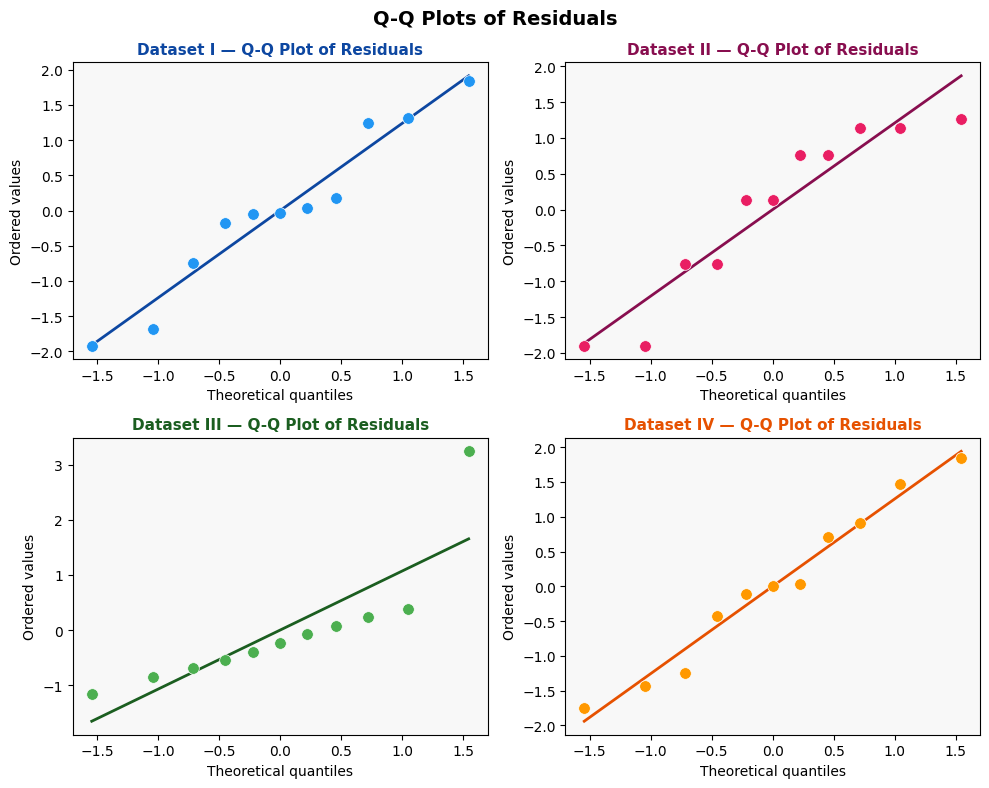

Saved: qq_plots.png


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (name, group) in enumerate(df.groupby('dataset')):
    ax = axes[i]
    color = COLORS[name]
    dark = DARK_COLORS[name]
    slope, intercept, *_ = sp_stats.linregress(group['x'], group['y'])
    fitted = slope * group['x'] + intercept
    residuals = group['y'] - fitted
    # probplot returns (osm, osr) and the line; recolor after plotting
    (osm, osr), (slope_qq, intercept_qq, r) = sp_stats.probplot(residuals, dist='norm')
    ax.scatter(osm, osr, color=color, s=70, edgecolors='white', linewidths=0.5, zorder=3)
    x_ref = np.array([min(osm), max(osm)])
    ax.plot(x_ref, slope_qq * x_ref + intercept_qq, color=dark, linewidth=2)
    ax.set_facecolor('#F8F8F8')
    ax.set_title(f'Dataset {name} — Q-Q Plot of Residuals', fontsize=11, fontweight='bold', color=dark)
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel('Ordered values')

fig.suptitle('Q-Q Plots of Residuals', fontsize=14, fontweight='bold')
plt.tight_layout()
fig.savefig('qq_plots.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: qq_plots.png')

## 8. Commentary

### What the statistics say
All four datasets have nearly identical:
- **Mean of x** ≈ 9.0, **mean of y** ≈ 7.5
- **Variance of x** ≈ 11.0, **variance of y** ≈ 4.1
- **Pearson correlation** ≈ 0.816
- **Regression line** ≈ y = 0.5x + 3.0

### What the plots reveal
| Dataset | Color | Pattern |
|---|---|---|
| **I** | Blue | Clean linear relationship with normally distributed scatter — the 'textbook' case |
| **II** | Pink/Red | Curved (quadratic) relationship — a linear model is the wrong choice |
| **III** | Green | Linear relationship except for one influential outlier that distorts the regression line |
| **IV** | Orange | All x values are identical (x=8) except one leverage point (x=19) — the regression line is entirely driven by that single point |

### Key takeaway
Summary statistics alone can be deeply misleading. Always visualize your data before fitting models or drawing conclusions.